In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import datetime

import warnings
warnings.filterwarnings('ignore')
print('Libraries Import Successful')

Libraries Import Successful


In [2]:
Tdata=pd.read_csv('TelcoCustomerChurn.csv')

#Lets write one function to find out missing values ,unique values ,data types

print("Rows     : ",Tdata.shape[0])
print("Columns  : ",Tdata.shape[1])

def df_summary(df):
    df_U=df.nunique()
    df_M=df.isnull().sum()
    df_I=df.dtypes
    df_U=df_U.to_frame().reset_index()
    df_M=df_M.to_frame().reset_index()
    df_I=df_I.to_frame().reset_index()
    df_U = df_U.rename(columns= {0: 'Unique Data'})
    df_M = df_M.rename(columns= {0: 'Missing Data'})
    df_I = df_I.rename(columns= {0: 'Data Types'})
    output = pd.merge(pd.merge(df_M,df_U,on='index'),df_I,on='index')
    return output;  

Rows     :  7043
Columns  :  21


In [3]:
df_summary(Tdata)

,index,Missing Data,Unique Data,Data Types
0,customerID,0,7043,object
1,gender,0,2,object
2,V1,0,2,int64
3,V2,0,2,object
4,V3,0,2,object
5,V4,0,73,int64
6,V5,0,2,object
7,V6,0,3,object
8,V7,0,3,object
9,V8,0,3,object


In [4]:
#All variable are looking good but Surprislingly amoung all the variable V18 having many classes

Tdata.V18.head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: V18, dtype: object

In [5]:
#Seems the variables is wrongly classified as object data type .
#We will convert into Numerical

Tdata.V18= pd.to_numeric(Tdata.V18, errors='coerce')
Tdata.V18.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: V18, dtype: float64

In [6]:
df_summary(Tdata)

,index,Missing Data,Unique Data,Data Types
0,customerID,0,7043,object
1,gender,0,2,object
2,V1,0,2,int64
3,V2,0,2,object
4,V3,0,2,object
5,V4,0,73,int64
6,V5,0,2,object
7,V6,0,3,object
8,V7,0,3,object
9,V8,0,3,object


In [7]:
Tdata['V18']=Tdata['V18'].fillna(Tdata['V18'].mean())
Tdata['V18'].isnull().sum()

0

In [8]:
Tdata.drop('customerID',axis=1, inplace=True)
Tdata.columns

Index(['gender', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'Churn'],
      dtype='object')

In [9]:
#Lets seperate Object Columns and Numerical Columns 

Num_Cols=Tdata.select_dtypes(include=['float64','int64']).columns.tolist()

Cat_Cols=Tdata.select_dtypes(include=['object']).columns.tolist()


In [10]:
Tdata[Num_Cols].describe()

,V1,V4,V17,V18
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


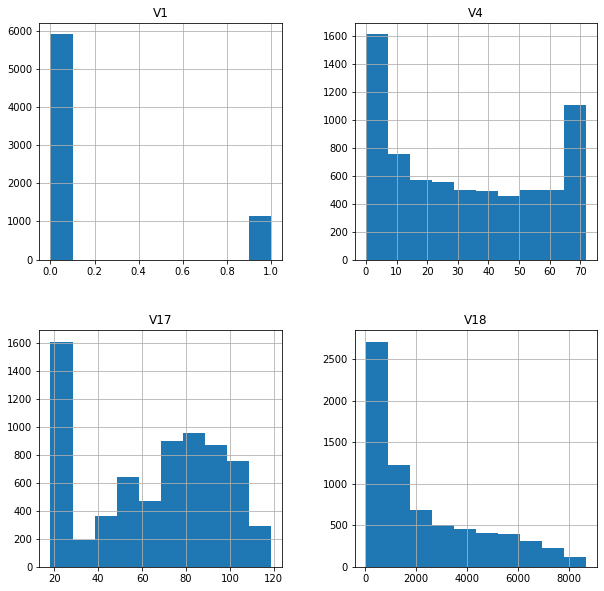

In [11]:
Tdata[Num_Cols].hist(figsize=(10,10));

Data is skewed in V17 & V18 variable

In [12]:
#Creating function to see all the object data type variables using single function

def cat_col_desc(data):
    col_list = data.select_dtypes(include=['object']).columns.tolist()
    for i in col_list: 
        print("Variable :", i)
        print("Count of unique values :", len(set( data[i])))
        print("Unique values : " ,set( data[i]))
        print("================================")

In [13]:
cat_col_desc(Tdata)

Variable : gender
Count of unique values : 2
Unique values :  {'Male', 'Female'}
Variable : V2
Count of unique values : 2
Unique values :  {'Yes', 'No'}
Variable : V3
Count of unique values : 2
Unique values :  {'Yes', 'No'}
Variable : V5
Count of unique values : 2
Unique values :  {'Yes', 'No'}
Variable : V6
Count of unique values : 3
Unique values :  {'Yes', 'No', 'No phone service'}
Variable : V7
Count of unique values : 3
Unique values :  {'Fiber optic', 'DSL', 'No'}
Variable : V8
Count of unique values : 3
Unique values :  {'Yes', 'No internet service', 'No'}
Variable : V9
Count of unique values : 3
Unique values :  {'Yes', 'No internet service', 'No'}
Variable : V10
Count of unique values : 3
Unique values :  {'Yes', 'No internet service', 'No'}
Variable : V11
Count of unique values : 3
Unique values :  {'Yes', 'No internet service', 'No'}
Variable : V12
Count of unique values : 3
Unique values :  {'Yes', 'No internet service', 'No'}
Variable : V13
Count of unique values : 3
Uniq

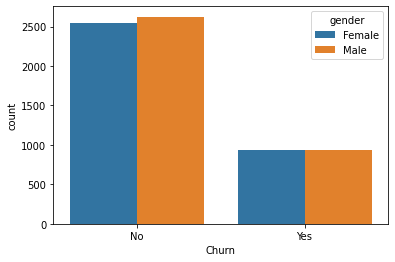

In [14]:
sns.countplot(x='Churn',hue='gender',data=Tdata);

In [15]:
Binary_class = Tdata[Cat_Cols].nunique()[Tdata[Cat_Cols].nunique() == 2].keys().tolist()
Multi_class =  Tdata[Cat_Cols].nunique()[Tdata[Cat_Cols].nunique() > 2].keys().tolist()
print(Binary_class)
print(Multi_class)

['gender', 'V2', 'V3', 'V5', 'V15', 'Churn']
['V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V16']


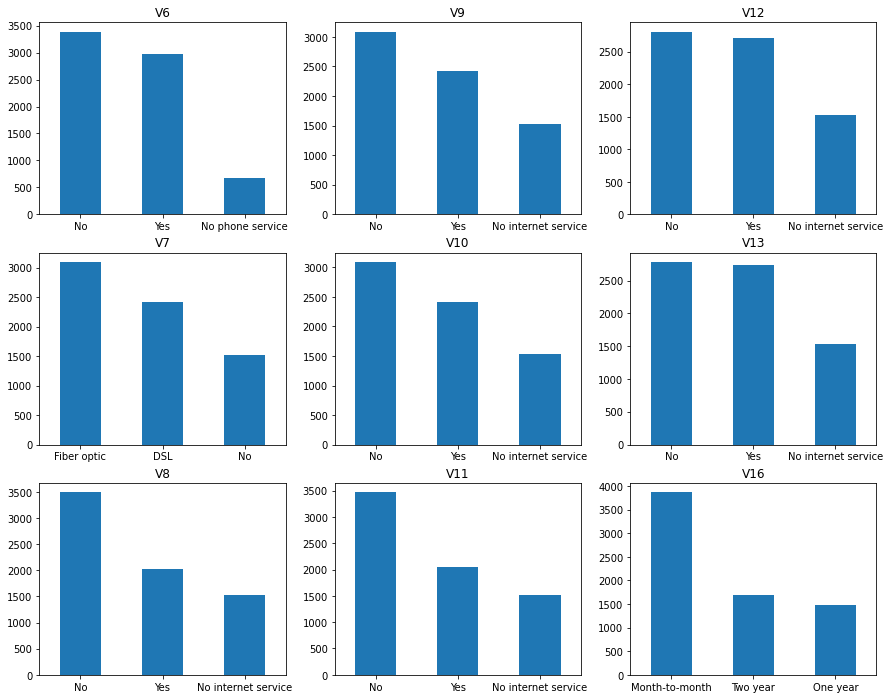

In [16]:
# Multi class variable distribution

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(Multi_class):
    if i < 3:
        ax = Tdata[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = Tdata[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = Tdata[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

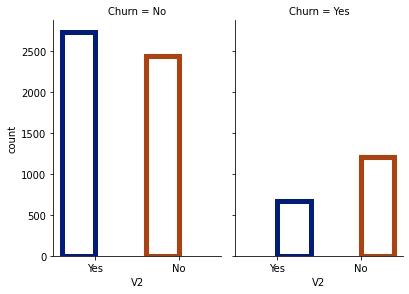

In [17]:
sns.catplot(x="V2", hue="Churn", col="Churn",data=Tdata, kind="count",height=4, aspect=.7,  facecolor=(0, 0, 0, 0),
linewidth=5,edgecolor=sns.color_palette("dark", 5))

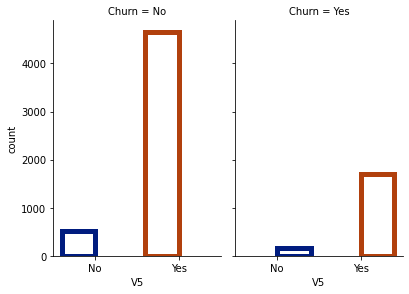

In [18]:
sns.catplot(x="V5", hue="Churn", col="Churn",data=Tdata, kind="count",height=4, aspect=.7,  facecolor=(0, 0, 0, 0),
linewidth=5,edgecolor=sns.color_palette("dark", 5))

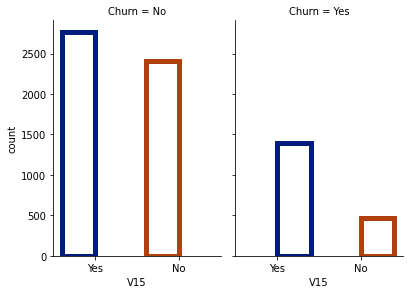

In [19]:
sns.catplot(x="V15", hue="Churn", col="Churn",data=Tdata, kind="count",height=4, aspect=.7,  facecolor=(0, 0, 0, 0),
linewidth=5,edgecolor=sns.color_palette("dark", 5))

In [20]:
#Label encoding Binary Columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in Binary_class:
    Tdata[i]=le.fit_transform(Tdata[i])

In [21]:
Tdata[Binary_class].shape

(7043, 6)

In [22]:
Tdata[Num_Cols].shape

(7043, 4)

In [23]:
Tdata_Dummy=pd.get_dummies(Tdata[Multi_class])
Tdata_Dummy.head()

,V6_No,V6_No phone service,V6_Yes,V7_DSL,V7_Fiber optic,V7_No,V8_No,V8_No internet service,V8_Yes,V9_No,...,V13_No,V13_No internet service,V13_Yes,V14_Month-to-month,V14_One year,V14_Two year,V16_Bank transfer (automatic),V16_Credit card (automatic),V16_Electronic check,V16_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,1,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0


In [24]:
final_df = pd.concat([Tdata[Num_Cols],Tdata[Binary_class],Tdata_Dummy], axis=1)
final_df.shape

(7043, 41)

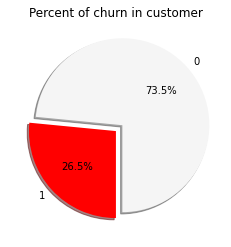

In [25]:
# Data to plot
labels =final_df['Churn'].value_counts(sort = True).index
sizes = final_df['Churn'].value_counts(sort = True)

colors = ["whitesmoke","red"]
explode = (0.1,0)  # explode 1st slice
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of churn in customer')
plt.show()

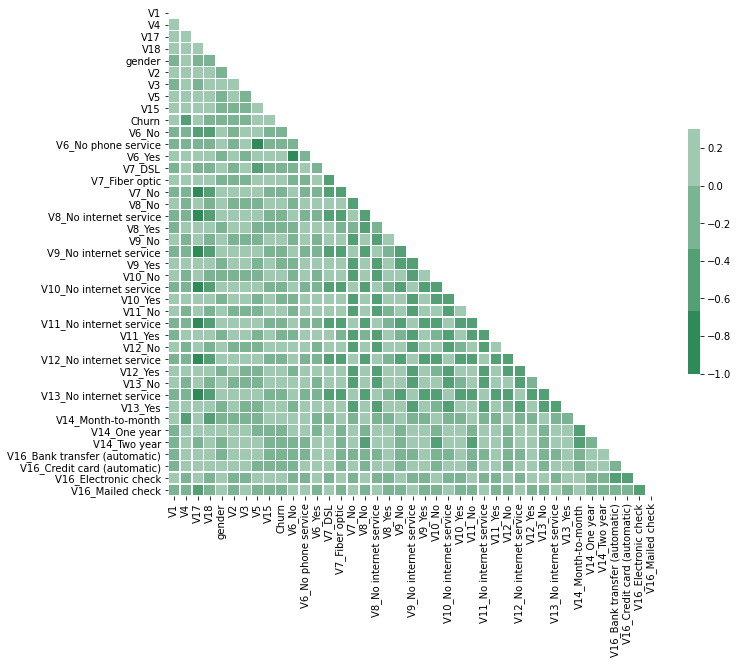

In [26]:
#Correlation
corr=final_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap=sns.light_palette("seagreen", reverse=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

From the above heatmap we can see the highly correlated variables with dark green associated
For example
V4 variable is highly correlated with V14 Month to Month and Churn V17 is correlated with most of the variables with No internete service and NO classes

Like the above examples we can interpret the variables with most correlated in the same data set

In [27]:
from sklearn.model_selection import train_test_split
X = final_df.drop(['Churn'],axis=1)
y = final_df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =1)

In [28]:
print('The number of samples into the Train data is {}.'.format(X_train.shape[0]))
print('The number of samples into the test data is {}.'.format(X_test.shape[0]))

The number of samples into the Train data is 5634.
The number of samples into the test data is 1409.


### Model - Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

logistic_model=LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [30]:
accuracy = logistic_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy*100)

Logistic Regression accuracy is : 81.19233498935415


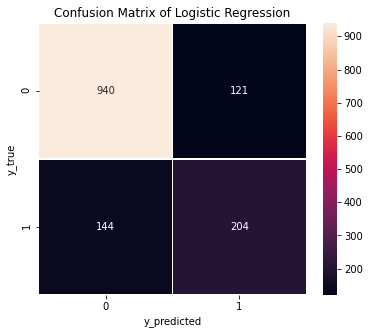

In [31]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,logistic_model.predict(X_test))

# %% confusion matrix visualization
import seaborn as sns
f, ax = plt.subplots(figsize = (6,5))
sns.heatmap(cm_lr, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

In [33]:
# View the model coefficients
list(zip(X_train.columns, logistic_model.coef_[0]))

[('V1', 0.21856744245945048),
 ('V4', -0.06665261135076692),
 ('V17', -0.001606446193971349),
 ('V18', 0.00040029691593963866),
 ('gender', -0.011653500822613155),
 ('V2', 0.05657024069339381),
 ('V3', -0.09847588169906152),
 ('V5', -0.24365911802388443),
 ('V15', 0.3633697159670079),
 ('V6_No', -0.21639635804027285),
 ('V6_No phone service', 0.07336572637792557),
 ('V6_Yes', -0.02726275993732609),
 ('V7_DSL', -0.37265637352417047),
 ('V7_Fiber optic', 0.339501678653596),
 ('V7_No', -0.13713869679992882),
 ('V8_No', 0.20575298937779815),
 ('V8_No internet service', -0.13713869679992882),
 ('V8_Yes', -0.2389076843057789),
 ('V9_No', 0.09461257254882241),
 ('V9_No internet service', -0.13713869679992882),
 ('V9_Yes', -0.12776726743552602),
 ('V10_No', 0.05489676960609121),
 ('V10_No internet service', -0.13713869679992882),
 ('V10_Yes', -0.08805146450284493),
 ('V11_No', 0.20380335328183372),
 ('V11_No internet service', -0.13713869679992882),
 ('V11_Yes', -0.23695804811326582),
 ('V12_N

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test,logistic_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1061
           1       0.63      0.59      0.61       348

    accuracy                           0.81      1409
   macro avg       0.75      0.74      0.74      1409
weighted avg       0.81      0.81      0.81      1409



In [35]:
from sklearn.metrics import roc_curve,roc_auc_score
def plot_roc_curve(y_train_actual, train_pred_prob, y_test_actual, test_pred_prob, *args):
    '''
    Generate the train & test roc curve
    '''

    AUC_Train = roc_auc_score(y_train_actual, train_pred_prob)
    AUC_Test = roc_auc_score(y_test_actual, test_pred_prob)

    if len(args) == 0:
        print("Train AUC = ", AUC_Train)
        print("Test AUC = ", AUC_Test)
        fpr, tpr, thresholds = roc_curve(y_train_actual, train_pred_prob)
        fpr_tst, tpr_tst, thresholds = roc_curve(y_test_actual, test_pred_prob)
        roc_plot(fpr, tpr, fpr_tst, tpr_tst)

    else:
        AUC_Valid = roc_auc_score(args[0], args[1])
        print("Train AUC = ", AUC_Train)
        print("Test AUC = ", AUC_Test)
        print("Validation AUC = ", AUC_Valid)
        fpr, tpr, thresholds = roc_curve(y_train_actual, train_pred_prob)
        fpr_tst, tpr_tst, thresholds = roc_curve(y_test_actual, test_pred_prob)
        fpr_val, tpr_val, thresholds = roc_curve(args[0], args[1])
        roc_plot(fpr, tpr, fpr_tst, tpr_tst, fpr_val, tpr_val)

In [36]:
def roc_plot(fpr, tpr, fpr_tst, tpr_tst, *args):
    '''
    Generates roc plot
    '''

    fig = plt.plot(fpr, tpr, label='Train')
    fig = plt.plot(fpr_tst, tpr_tst, label='Test')

    if len(args) == 0:
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title("ROC curve using Logistic Regression")
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()

    else:
        fig = plt.plot(args[0], args[1], label='Validation')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()

Train AUC =  0.8446959361227442
Test AUC =  0.8583571668454181


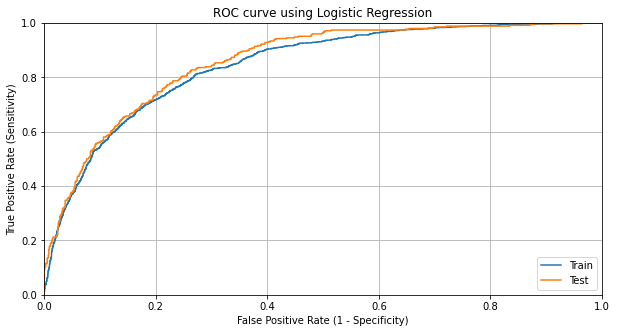

In [37]:

plt.subplots(figsize=(10, 5))
train_prob = logistic_model.predict_proba(X_train)[:, 1]
test_prob = logistic_model.predict_proba(X_test)[:, 1]

plot_roc_curve(y_train, train_prob,
               y_test, test_prob)

## Changing the threshold for the Model
#### By defualt, Logistis regression predicts the probability at 0.5 Threshold, We will be creating a function to check the metrics at each threshold Level. 

In [38]:
from sklearn.metrics import accuracy_score
pred_proba_df = pd.DataFrame(logistic_model.predict_proba(X_test)[:,1])

threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8]
for i in threshold_list:
    print ('For Threshold = {} '.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)    
    test_accuracy = accuracy_score(y_test,Y_test_pred)
    print('Accuracy {}'.format(test_accuracy))
    print()


For Threshold = 0.05 
Accuracy 0.49254790631653655

For Threshold = 0.1 
Accuracy 0.6110716820440029

For Threshold = 0.15 
Accuracy 0.673527324343506

For Threshold = 0.2 
Accuracy 0.7075940383250532

For Threshold = 0.25 
Accuracy 0.7423704755145494

For Threshold = 0.3 
Accuracy 0.765791341376863

For Threshold = 0.35 
Accuracy 0.7792760823278921

For Threshold = 0.4 
Accuracy 0.7863733144073811

For Threshold = 0.45 
Accuracy 0.8034066713981547

For Threshold = 0.5 
Accuracy 0.8119233498935415

For Threshold = 0.55 
Accuracy 0.8190205819730305

For Threshold = 0.6 
Accuracy 0.8147622427253371

For Threshold = 0.65 
Accuracy 0.8097941802696949

For Threshold = 0.7 
Accuracy 0.7885024840312278

For Threshold = 0.75 
Accuracy 0.7785663591199432

For Threshold = 0.8 
Accuracy 0.7622427253371186



In [44]:
#Predictions
final_predictions=pd.DataFrame()
final_predictions['Actual']=final_df["Churn"]
final_predictions['Predictions']=logistic_model.predict(final_df.drop(['Churn'],axis=1))

final_predictions.head()

,Actual,Predictions
0,0,1
1,0,0
2,1,0
3,0,0
4,1,1


In [49]:
from sklearn.metrics import auc

fpr,tpr,thresholds=roc_curve(final_df["Churn"],logistic_model.predict(final_df.drop(['Churn'],axis=1)))
roc_auc=auc(fpr,tpr)

GINI=(2 * roc_auc) - 1
print("GINI : ",(GINI)*100,"%")

GINI :  45.70126013861544 %
